In [4]:
import numpy as np
import matplotlib.pylab as plt
import random

In [42]:
def crisisscore(x):
    
    events={"initval":1.2,"cooperative":0.007, "neutral":-0.001, "verbact":-0.005, "polact":-0.017, "ecact":-0.021, "nonvmil":-0.124, "vmil":-0.228, "iclsh":-0.350, "mclsh":-0.395, "iwar":-0.458, "war":-0.584, "strike":-1,"mpact":0.14, "pact":0.24}
    initiate=events["initval"]
    for i in range(x):
        generate=random.random()
        
        if initiate >=0.9:
            newevent=random.choice(["cooperative","neutral","verbact"])
            initiate=initiate+events[newevent]
        if initiate >=0.7 and initiate <0.9:
            newevent=random.choice(["polact","neutral","ecact","verbact","mpact"])
            initiate=initiate+events[newevent]
        if initiate >=0.5 and initiate < 0.7:
            newevent=random.choice(["polact","ecact","nonvmil","vmil","iclsh","mpact"])
            initiate=initiate+events[newevent]
        if initiate >=0.3 and initiate < 0.5:
            newevent=random.choice(["nonvmil","vmil","iclsh","mclsh","iwar","pact"])
            initiate=initiate+events[newevent]
        if initiate >=0 and initiate < 0.3:
            newevent=random.choice(["iwar","war","strike","pact","mpact"])
            initiate=initiate+events[newevent]
        if initiate <0:
            initiate=0
    return initiate

In [43]:
def multisimulate(x,y):
    newarray=[]
    for i in range(y):
        newarray.append(crisisscore(x))
    return newarray

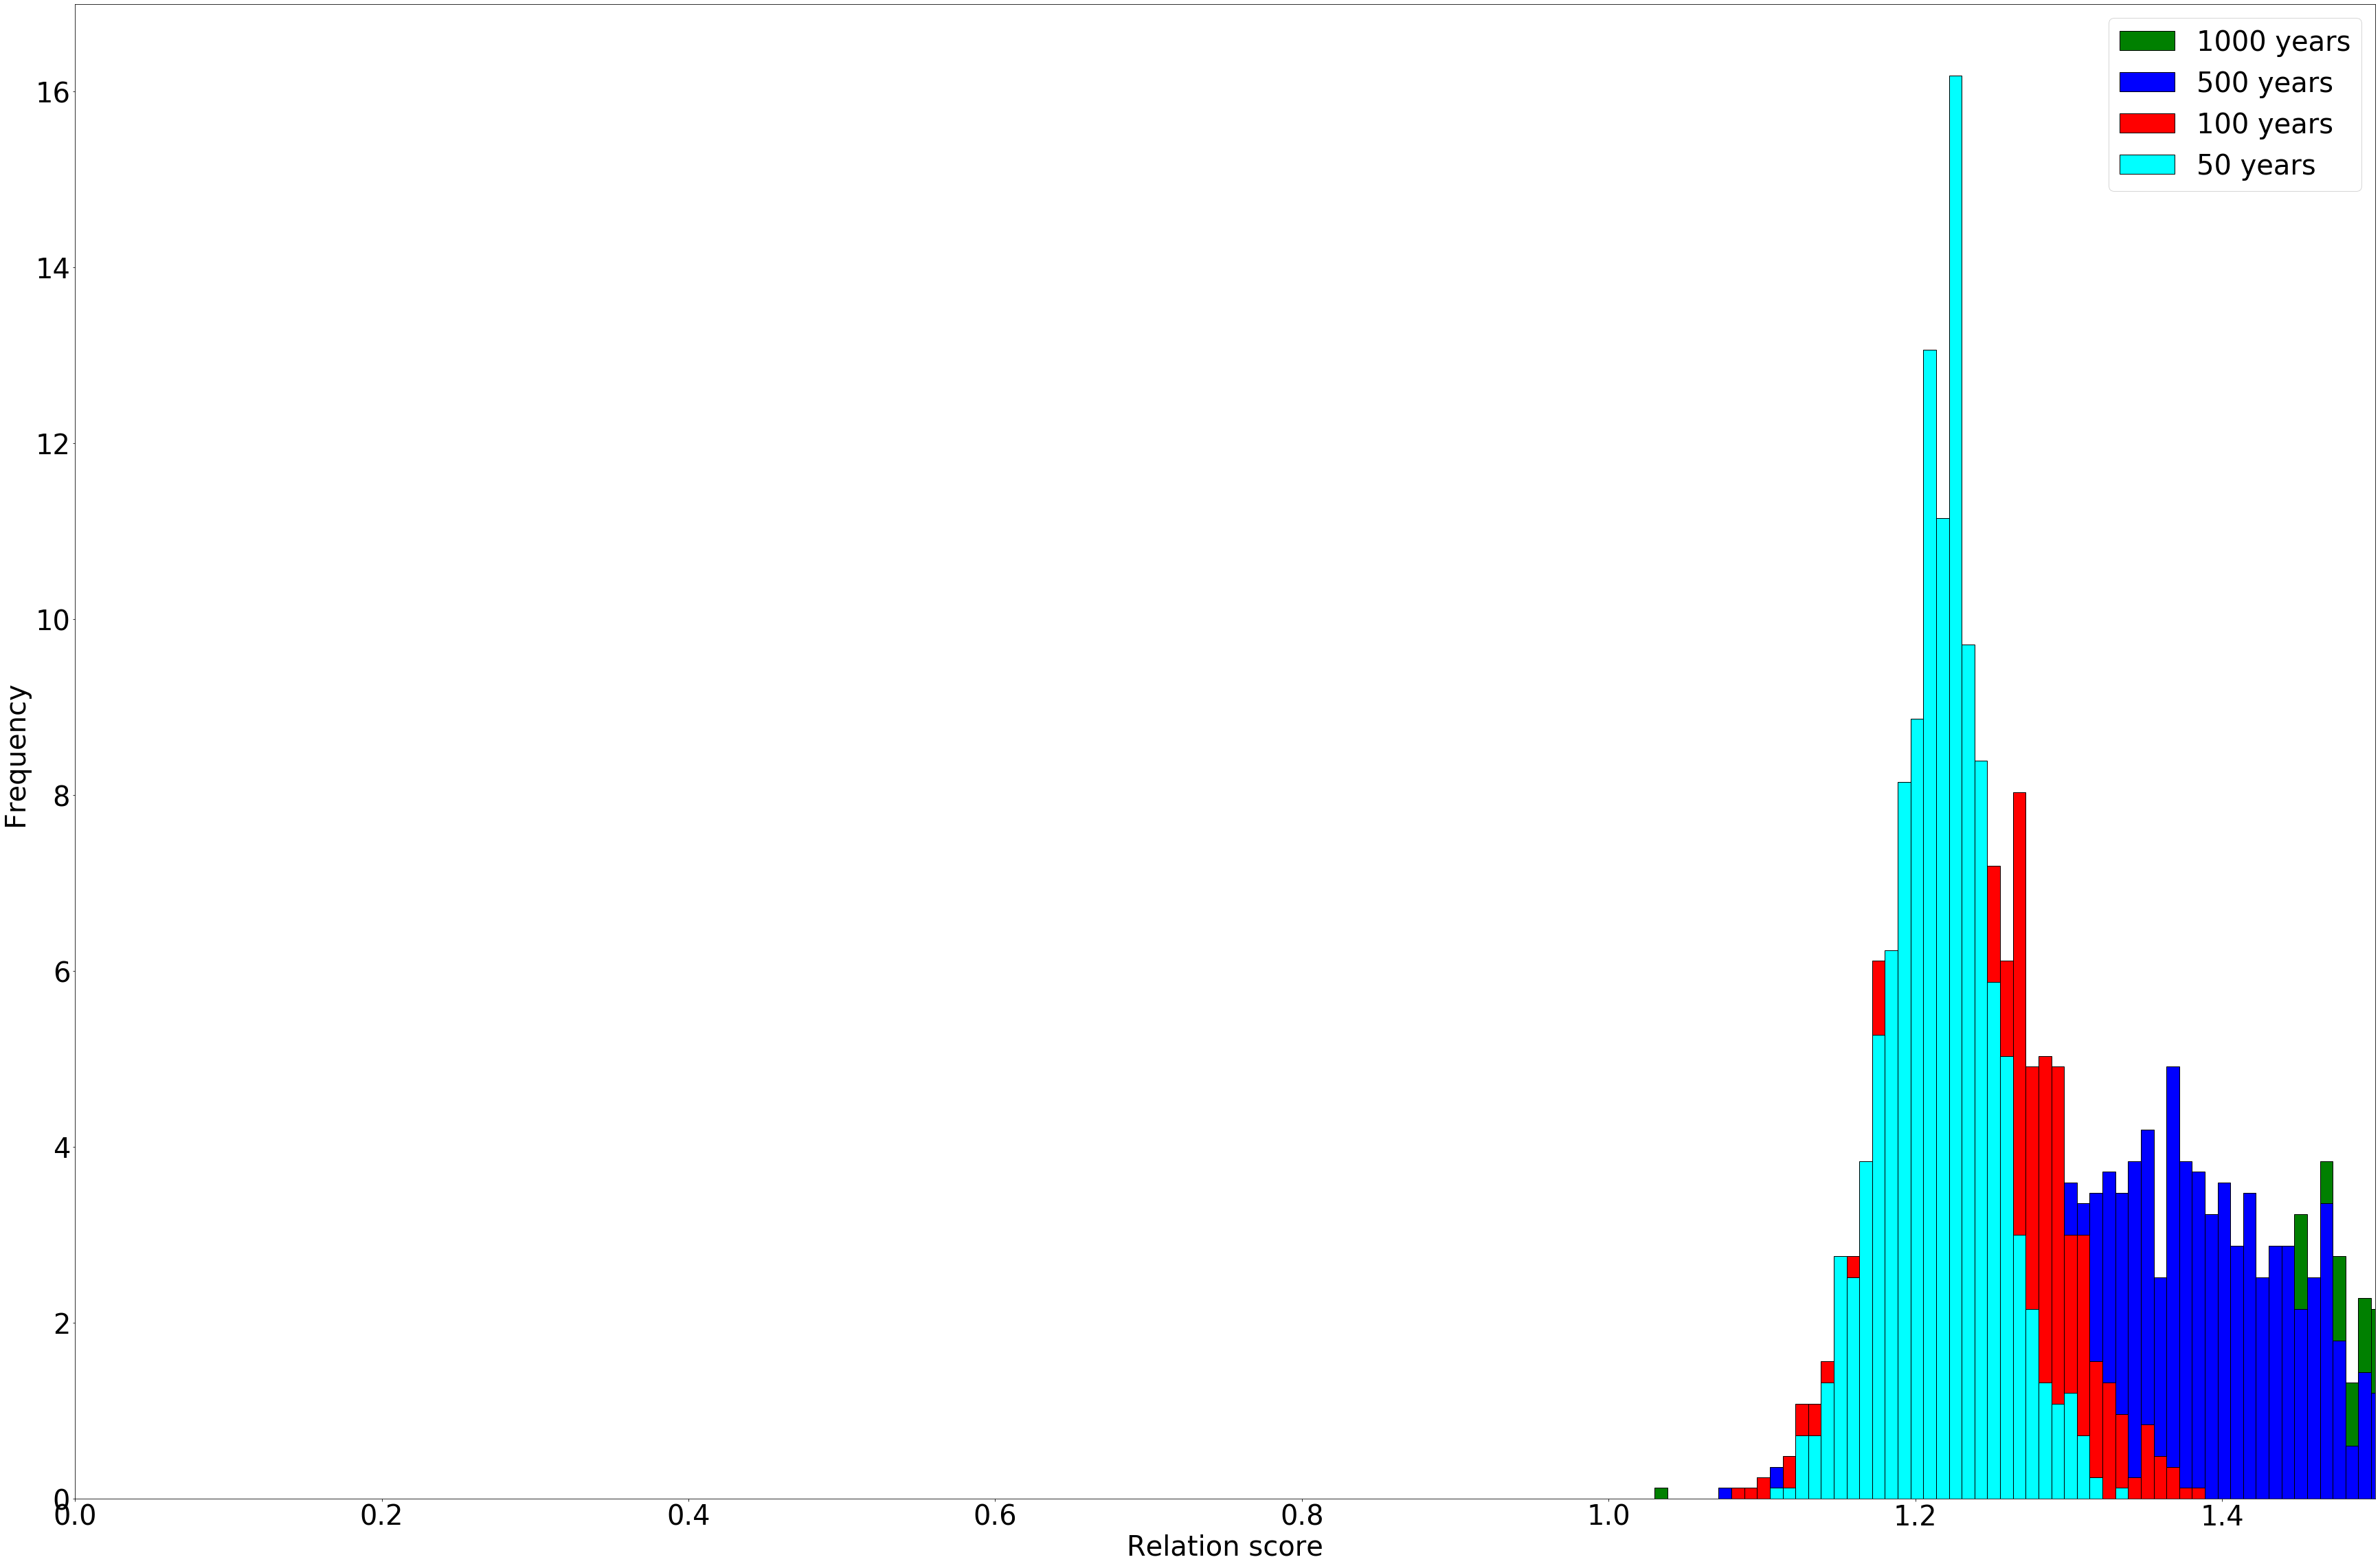

In [44]:
bins=np.histogram(np.hstack((multisimulate(1000,1000),multisimulate(500,1000),multisimulate(100,1000),multisimulate(50,1000))), bins=140)[1] 
plt.figure(figsize=(60,40))

plt.hist(multisimulate(1000,1000), histtype='bar',density=True,bins=bins,color="green",label="1000 years",edgecolor='black')
plt.hist(multisimulate(500,1000), histtype='bar',density=True, bins=bins,color="blue",label="500 years",edgecolor='black')
plt.hist(multisimulate(100,1000), histtype='bar',density=True, bins=bins,color="red",label="100 years",edgecolor='black')
plt.hist(multisimulate(50,1000), histtype='bar',density=True, bins=bins,color="cyan",label="50 years",edgecolor='black')
#plt.normalize()
plt.xlim(0,1.5)
plt.xlabel("Relation score",fontsize=40)
plt.ylabel("Frequency ",fontsize=40)
plt.xticks(size=40)
plt.yticks(size=40)

plt.legend(fontsize=40)